In [1]:
import pandas as pd

co2 = pd.read_csv("../../HumanImpact/emissions/data/v50_CO2_excl_short-cycle_org_C_2018.txt", delimiter=';')

print(co2)

          lat    lon    emission
0        88.1  -50.7     11.0301
1        88.1  -50.6     15.7066
2        88.1  -50.5     19.1943
3        88.1  -50.4     22.0621
4        88.1  -50.3     24.5536
...       ...    ...         ...
2191880 -77.8  166.5  11459.2000
2191881 -77.8  166.6    694.4980
2191882 -77.9  166.3   2133.1000
2191883 -77.9  166.4   1389.0000
2191884 -77.9  166.5   7887.5100

[2191885 rows x 3 columns]


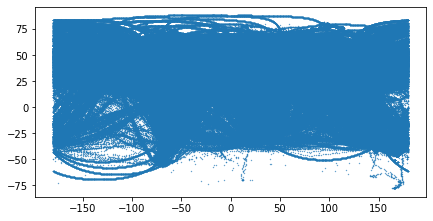

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(7, 3.5)
plt.scatter(co2['lon'], co2['lat'], s=0.1)
plt.savefig(f"outputs/raw1.png", dpi=600, bbox_inches='tight')

plt.show()

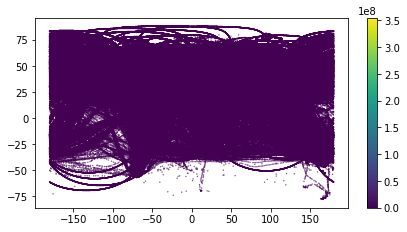

In [3]:
fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(co2['lon'], co2['lat'], c=co2['emission'], s=0.1)
plt.colorbar(cols)
plt.savefig(f"outputs/raw2.png", dpi=600, bbox_inches='tight')

plt.show()

In [4]:
import numpy as np

print(co2.emission.value_counts())
print()
print("Min value: ", np.amin(co2.emission))
print("Max value: ", np.amax(co2.emission))

347.2490      30310
248.0350      27141
297.6420      22373
396.8560      17280
148.8210      17257
              ...  
42337.8000        1
42129.7000        1
260.5530          1
42128.7000        1
95.1692           1
Name: emission, Length: 1215854, dtype: int64

Min value:  8.016030000000001e-07
Max value:  355301000.0


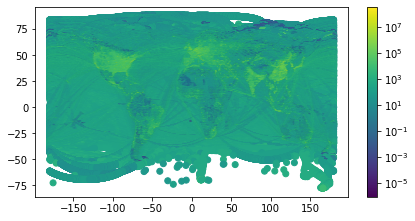

In [5]:
from matplotlib import colors

fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(co2['lon'], co2['lat'], c=co2['emission'], norm=colors.LogNorm())
plt.colorbar(cols)
plt.savefig(f"outputs/raw3.png", dpi=600, bbox_inches='tight')

plt.show()

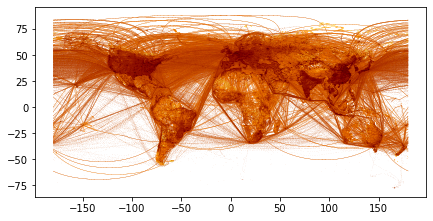

In [6]:
fig = plt.figure()
fig.set_size_inches(7, 3.5)
plt.scatter(co2['lon'], co2['lat'], s=0.05, edgecolors='none', c=co2['emission'], norm=colors.LogNorm(), cmap='afmhot_r')
plt.savefig(f"outputs/raw4.png", dpi=600, bbox_inches='tight')

plt.show()

In [7]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(co2['lon'], co2['lat'])]
geodata = gpd.GeoDataFrame(co2, crs="EPSG:4326", geometry=geometry)

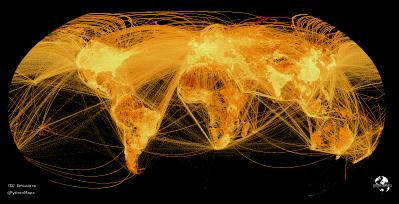

In [8]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')
fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap='afmhot', norm=colors.LogNorm(), s=0.05, edgecolors='none')
plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-8000000, 9000000)

logo = plt.imread('../../Branding/globe_black.png')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)

plt.savefig(f"outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

our_cmap = cm.get_cmap('afmhot', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))

black = np.array([0.0, 0.0, 0.0, 1.0])
newcolors[:1, :] = black
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 0.06, 6, 60, 600, 3000, 6000, 24000, 45000, 120000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

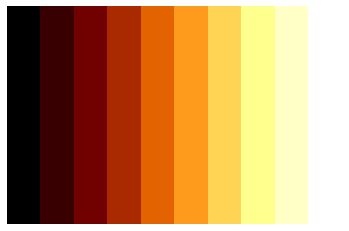

In [10]:
gradient = np.linspace(0, 1, 10)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=our_cmap)
plt.axis('off')
plt.savefig("outputs/raw6.png", dpi=600, bbox_inches='tight')
plt.show()

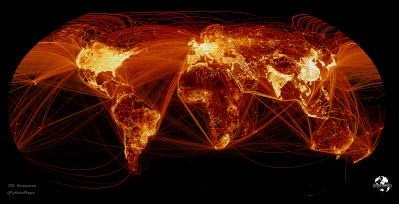

In [11]:
fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')

fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='grey',
              transform = ax.transAxes)

ax.set_ylim(-8000000, 9000000)
plt.savefig(f"outputs/raw7.png", dpi=600, bbox_inches='tight')
plt.show()

In [12]:
colorbar_cmap = cm.get_cmap('afmhot', 9)
newcolors = colorbar_cmap(np.linspace(0, 1, 9))

black = np.array([0.0, 0.0, 0.0, 1.0])
newcolors[:1, :] = black
colorbar_cmap = ListedColormap(newcolors)
bounds = [0.06, 6, 60, 600, 3000, 6000, 24000, 45000, 120000]
colorbar_norm = colors.BoundaryNorm(bounds, colorbar_cmap.N)

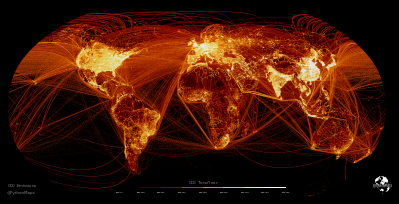

In [13]:
fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')

fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='grey',
              transform = ax.transAxes)

ax.set_ylim(-8000000, 9000000)

fig = ax.get_figure()
cax = fig.add_axes([0.36, 0.16, 0.33, 0.004])
sm = plt.cm.ScalarMappable(cmap=colorbar_cmap, norm=colorbar_norm)
sm._A = []
cb = fig.colorbar(sm, cax=cax, orientation="horizontal", pad=0.2, format='%.1e')
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=2, width=0, length=0, color='white') 
cbytick_obj = plt.getp(cb.ax, 'xticklabels' ) #Set y tick label color
plt.setp(cbytick_obj, color='white')
cb.ax.set_xlabel('CO$_2$ Tons/Year', fontsize=4, color='grey', labelpad=-14)
plt.savefig(f"outputs/raw8.png", dpi=600, bbox_inches='tight')
plt.show()